# Project 4 - Extrasolar Planets

**Project deadline:** This project is due for submission on Monday, 04.07.2022, 23:55. Please check carefully the *About the Projects* section below for further details.

**Imprtant:** You again have the choice between two projects. This one focusses on an advanced scientific problem from astronomy (detection and analysis of extrasolar planets). It teaches modern analysis techniques, advanced statistical techniques  and it is based on real observations. The other project focusses on the implementation and analysis of a more complex system of differential equations. You will also learn how to create animations woth matplotlib.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We hand-out four projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook to [Projects/Project 4](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html) on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Monday, 04.07.2022, 23:55. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Nina and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## Scientific Background

In this problem set, we are going to investigate a dataset that contains the *radial velocity* of a star at various points in time. The radial velocity is the velocity with which the star is moving towards or away from us (positive velocities indicate it is moving away from us).

If a star is not close to any other objects, there is no reason why the radial velocity should change over time. However, in the case where a second object is orbiting a star (such as a planet or another star), the star and the object will both orbit the center of mass of the two-body system. Therefore, the star will show periodic variations in its velocity over time. These changes in velocity then cause a shift in spectral lines via the Doppler effect, which we can measure with telescopes that have state-of-the art spectrographs. The smaller the second object, the less the star will be affected. For example, the Earth causes the Sun to change its velocity with an amplitude of 0.1 m/s over 1 year.

See the following video to see an example of a large planet orbiting a star and the effect on the observed spectral lines of the star:

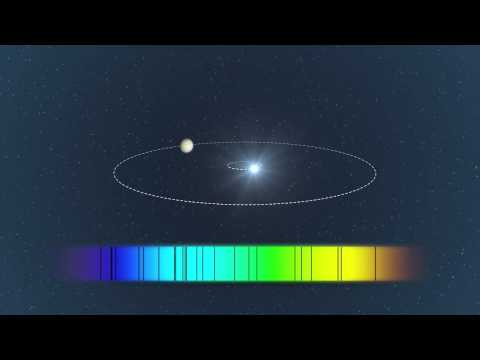

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("-BuwWtMygxU")

Measuring the radial velocity of stars to very high precision can therefore be used to find planets. Note that we cannot simply measure the velocity of planets around other stars, since they are much fainter than the stars themselves. Hence, they cannot be observed directly but we rely on *indirect* measures to detect them.

In this project, we want to find out whether a particular star has a companion object, and if so, we want to estimate the probability that the companion object is a planet.

## Analysis of a Extrasolar Planet candidate

The data file required for this project is [data/UID_0113357_RVC_001.tbl](data/UID_0113357_RVC_001.tbl). It was obtained from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/DisplayOverview/nph-DisplayOverview?objname=51+Peg+b&type=CONFIRMED_PLANET). Obtain the file, and then carry out the analysis described in Tasks 1 and Tasks 2.

**The first column is the time in days, the second column is the radial velocity in m/s, and the third column is the uncertainty in the radial velocity in m/s.** The fourth column can be ignored.

## Task 1 - Determination of the radial velocity of the host star

To start off, we want to see whether the star does indeed show periodic variations, and if so, we want to measure the period and amplitude. The amplitude is then a direct measure of the radial velocity.

**Read in the data and make a plot of the radial velocity in the file against time.** (make sure you include axis labels, units, and error bars!).

As you will see, the observations were not taken with equal spacing in time, and it does not look like we can easily see any periodic variations in the curve by eye, so we will instead use an automated method. The best way to find the period of a time series like this is to use a periodogram algorithm. One algorithm that works well in our case is the following:

1. pick a ``period``

2. compute the phase of the radial velocity curve:

        phase = (time % period) / period

3. sort the phase and velocity points by the phase.

4. find the length of a line that would join all the points, from left to right. If we write the sorted phase as $\phi$, the velocity as $v$, and the number of points as $N$, then this is:

  $$l = \sum_i^{N-1}{\sqrt{(\phi_{i+1} - \phi_{i})^2 + (v_{i+1} - v_{i})^2}}$$
  
  **Note:** Please consider the phase, the velocity and the length within the formula above as *unitless* quantities.  

5. repeat for different periods, and minimize the string length $l$.

**Implement this algorithm** and try and find the *string length* $l$ for 10,000 periods logarithmically spaced between 1 and 100 days. Note that the calculation of the string length should not use any loops, otherwise it will be very slow (but you can still loop over the periods).

**Hints:**

1. Please have a look at `np.logspace` to create a logarithmically spaced grid.

2. if you want to sort an array ``y`` according to the values of ``x``, you can use [np.argsort](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html):

    y_new = y[np.argsort(x)]

**Make a log-log plot of the string length versus the period** and describe the plot. You should see several clear minima. **Find the period** of the first clear minimum (optional question: why the first? what do the other minima correspond to?).

**Make a plot** of radial velocity (with error bars) versus phase for the period you found above, and if you have picked the period correctly you should see something that looks similar to one period of a sinusoidal function. This means that there are indeed periodic (and in fact sinusoidal) variations in the radial velocity curve, indicating that a second object is likely orbiting the star!

**Fit the radial velocity versus phase** using a function of the form:

$$f(x) = a \sin{(2\pi x + b)}$$

and **make a plot** of the radial velocity (with error bars) and with the best-fit overplotted.

The parameter $a$ will give the amplitude of the radial velocity curve (if it gives a negative value, be sure to make it positive for the next Task). **Find the uncertainty on $a$** using the covariance matrix returned by the fitting function.

You should now have the period, and the amplitude (with uncertainty) of the radial velocity curve!

## Task 2 - Mass analysis of the extrasolar planet *51 Peg b*

In this task, we will now try and estimate the mass of the invisible companion that is orbiting the star. At the end of Task 1, we found that the radial velocity curve could be well fit by a sinusoidal curve, which suggests that the invisible companion is on a circular orbit (at least to a good approximation).

For two bodies (in our case a star and an unknown object) orbiting a common center of mass in circular orbits, Kepler's 3rd law of motion states that:

$$\frac{4\pi^2}{T^2} = \frac{G M_\star (1 + q)}{R^3}$$

where $T$ is the orbital period, $M_\star$ is the mass of the star, $q$ is the ratio of the object mass to the mass of the star, and $R$ is the distance between the object and the star.

In addition, for two objects orbiting a common center of mass, the amplitudes of the velocities $K$ will be related to the mass of the two objects - with the more massive one moving less:

$$\frac{K_\star}{K_{\rm object}} = q$$

Finally, for a circular orbit:

$$K_{\rm object} T = 2\pi R$$

Substituting this back into Kepler's law and simplifying gives:

$$(1 + q)~q^3 = \frac{T K_{\rm star}^3}{2\pi G M_\star}$$

Finally, there is one final important thing to consider, which is that the velocity amplitude we measure for the star is not $K_{\rm star}$ but

$$K_{\rm obs,star} = K_{\rm star}~\sin{i}$$

where $i$ is the viewing angle of the system ($i=90^\circ$ means that we are observing the system *edge-on*, and $i=0^\circ$ corresponds to a *face-on* orientation where we would not see the star move towards or away from us). $K_{\rm obs,star}$ is the amplitude of the velocity - the ``a`` parameter - that you determined in Task 1.

Therefore, assuming $q << 1$, the final equation is:

$$q \approx \left(\frac{T}{2\pi G M_\star}\right)^{1/3} \frac{K_{\rm obs,star}}{\sin{i}}$$

**Compute the value of $q$** assuming the values of $T$ and $K_{\rm obs,star}$ you found in Part 1, and assuming $\sin{i}=1$ and assuming that $M_\star$ is the mass of the Sun ($M_\star=1.989\times 10^{30}$kg). Using $q$, derive the mass of the object in units of the mass of Jupiter ($M_{\rm Jupiter}=1.898\times 10^{27}$kg). Is the object likely to be a planet (see below)?

In reality, your measurement of $K_{\rm obs,star}$ has uncertainties, the mass of the star is uncertain, and the viewing angle is also uncertain. **Carry out a Monte-Carlo error propagation** simulation to find the likely distribution of masses for the object assuming that:

* the error on the radial velocity is the one derived in Part 1 and is a *normal* error (i.e. the distribution follows a Gaussian)

* the mass of the star is sampled from a *uniform distribution* between 0.6 and 1.4 times the mass of the Sun.

* the viewing angle can be anywhere between 0 and 90 degrees. However, one cannot simply sample $i$ randomly between 0 and 90 because some viewing angles are more likely than others - to do it properly you need to sample $\cos{i}$ uniformly between 0 and 1, then derive $i$ or $\sin{i}$ from this.

From the Monte-Carlo simulation, **plot a histogram** of the probability that the object has a certain mass, and show only the range from 0 to 13 times the mass of Jupiter.

**What is the (numerical) probability that the object is less massive than 13 times the mass of Jupiter?** (this is usually considered to be the upper limit for the mass of a planet). What degree of confidence do we have that the object is a planet, using the 1/2/3/4/5-sigma confidence terminology? (see [here](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) for more information).

Based on this, what can you conclude about the object?

**Important Notes:**  
- THIS SUBMISSION DOES NOT INCLUDE THE DATA FILE. The code requires the data file to be in the root of the folder. If the data file is in a different location, the path should be changed accordingly in the code. This needs to be done at only one cell, which is right after the "loading modules" cell.
- There is an option to load the data file directly from the git repository. This is not recommended, since this method downloads the file and loads the local copy of the file. This method, therefore, requires an internet connection and the notebook to have write permission. 
- Cells marked \#EXTRA do not add to the solution to the problem, but they do help understanding the solutions better. They also expand on the primary solution and offer additional insights into the problem. I decided to include them with this notebook as they better describe my flow of thoughts while going about solving the problems.

In [2]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

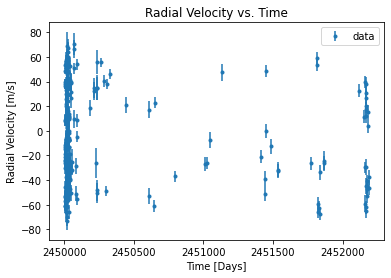

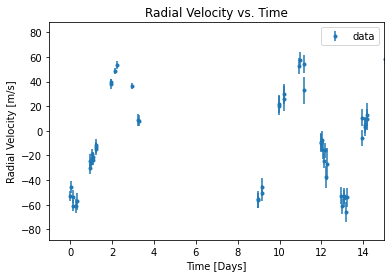

In [3]:
# TASK 1

# loading the data
# the data for this project is NOT included with this submission
# (the data file needs to be in the root of the folder from which the program is being run)
data = np.loadtxt('./UID_0113357_RVC_001.tbl')
# if you wish to use an alternate path for the file, modify the above line accordingly!

# the line below loads the data directly from the git repo on github
# but this method requires the notebook to have write permission (and an interenet connection, of course),
# since np.loadtxt downloads the file and loads the local copy of the file
# (uncomment the below line if you wish to load the file directly from the repo)
#data = np.loadtxt('https://raw.githubusercontent.com/terben/Programming_in_Python_BCGS_Summer_2022/master/lecture_10/data/UID_0113357_RVC_001.tbl')

# plot 1 - all of data
fig, ax = plt.subplots() # create a plot
ax.errorbar(data[:, 0], data[:, 1], yerr = data[:, 2], fmt = '.', label = 'data') # use errorbar for the plot
ax.set_title('Radial Velocity vs. Time') # plot title
ax.set_xlabel('Time [Days]') # x-axis label
ax.set_ylabel('Radial Velocity [m/s]') # y-axis label
ax.legend() # add legend
ax.ticklabel_format(style = 'plain') # use normal notation instead of scientific notation for x-axis
fig.show() # print the plot

# plot 2 - data for the first 15 days
fig, ax = plt.subplots() # create a plot
# in this plot, we use a slightly different x-axis
# we subtract the minimum value of the time readings from all the points so that first observation corresponds to day 0
# (this is equivalent to removing an offset)
ax.errorbar(data[:, 0] - min(data[:, 0]), data[:, 1], yerr = data[:, 2], fmt = '.', label = 'data') # use errorbar for the plot
ax.set_title('Radial Velocity vs. Time') # plot title
ax.set_xlabel('Time [Days]') # x-axis label
ax.set_ylabel('Radial Velocity [m/s]') # y-axis label
# use x-lim to show the data for the first 15 days
ax.set_xlim(min(data[:,0] - min(data[:, 0])) - 1, min(data[:,0] - min(data[:, 0])) + 15)
ax.legend() # add legend
fig.show() # print the plot

**Remarks:**  
As mentioned in the problem statement, we don't see any clear periodic variations in the first plot. It should also be noted that the file contains data spanning over about 6 years. This makes parts of the first plot rather dense.  
In the second plot, we limit the plot to the first 15 days to check whether any periodic variation or parts of periodic variation are visible. The choice of 15 days for this plot is reasonable since we can expect the true period, if it exists, to be less than this range for a system with a sun-like star. This is a bold assumption, which ignores a lot of other considerations. But this is fine, since we are just trying to get hints of periodic variations at the moment. In this plot, we can see some hints of periodic variation in the second chunk of data (between days 8 and 14). The data we have is not recorded at constant intervals, which makes the periodic variation obscure. We implement a _periodogram_ algorithm to extract the period.

In [4]:
# define a function implementing the periodogram algorithm given in the problem statement
def periodogram(testperiod, testdata):
    """This function is an implementation of a particular periodogram algorithm
    This function takes in a test period and the corresponding test data
    (the test data must be a multidimensional array containing the time as its first column, 
    interested quantity as its second column and errors in the quantity as its third column)
    and returns the string length l and a list of three arrays containing the sorted phase, sorted (according to phase) quantity
    and sorted (according to phase) errors in the quantities, in that order"""
    phase = np.zeros(len(testdata[:, 0])) # create an array to store the phases - the first column of the testdata contains the times 
    phase = ((testdata[:, 0]) % testperiod)/testperiod # calculate the phases
    phasesort = phase[np.argsort(phase)] # sort the phases (according to the phases)
    quantitysort = testdata[np.argsort(phase), 1] # sort the quantity (according to the phases)
    deltaquantitysort = testdata[np.argsort(phase), 2] # sort the errors in the quantity (according to the phases)
    l = np.sum(np.sqrt((phasesort[1:] - phasesort[:-1])**2 + (quantitysort[1:] - quantitysort[:-1])**2)) # calculate the string length
    # return the string length and a list containing the sorted phases, quantities and errors in the quantities
    return l, [phasesort, quantitysort, deltaquantitysort]

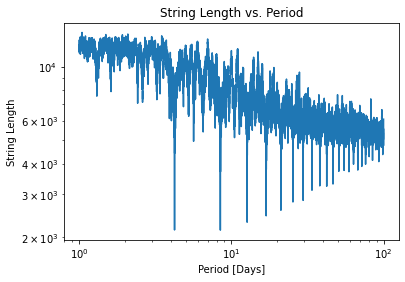

In [5]:
dayrange = np.logspace(0, 2, 10000) # create a logarithmic range for the periods
lvalue = np.zeros(len(dayrange)) # create an array to store the string length values for the corresponding periods
# use a for loop to get the string length for every period from the loagarithmic range
# we are not interested in the corresponding phases and velocities at the moment
# so we just use the same variable "phaseandvel" to store them throughout the loop
for i in range(len(dayrange)):
    # call the function for the i-th point in the range and store it as the i-th entry of the array
    lvalue[i], phaseandvel = periodogram(dayrange[i], data)

# plot
plt.plot(dayrange, lvalue) # plot string lengths against the periods
plt.title('String Length vs. Period') # set title
plt.xlabel('Period [Days]') # set x-axis title
plt.ylabel('String Length') # set y-axis title
# use loagarithmic scaling for both x- and y-axes
plt.xscale('log')
plt.yscale('log')
plt.show() # print the plot

**Remarks:**  
- We have the log-log plot of string length vs. period above and we see several clear minima. We can see that the string lengths are bounded between two values for all the days, except for the true period (or multiples of it), where it dips significantly.    
- The first clear minimum corresponds to the true period, whereas the consecutive clear minima are just multiples of this period (which are periods of the system as well). This can be seen from the plot with normal scaling below, where the minima are equally spaced.  
- We also notice that the first clear minimum occurs before 6-day period. Therefore, we use this knowledge from the plot to calculate the period corresponding to the first clear minimum.

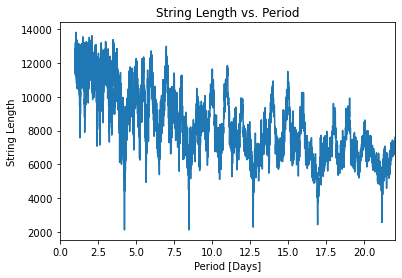

In [6]:
# plot (normal scaling)
plt.plot(dayrange, lvalue) # plot string lengths against the periods
plt.title('String Length vs. Period') # set title
plt.xlabel('Period [Days]') # set x-axis title
plt.ylabel('String Length') # set y-axis title
plt.xlim(0, 22) # limit to the first few minima
plt.show() # print the plot

In [7]:
slicedayrange = np.where(dayrange <= 6)[0] # consider only the first six days to get the first clear minimum
minperiod = dayrange[np.argmin(lvalue[slicedayrange])] # get the corresponding minimum period

# print the period
print("Period corresponding to the first clear minimium:", round(minperiod, 3), "days")

Period corresponding to the first clear minimium: 4.231 days


**Remarks:**  
Using the _periodogram_ algorithm, we get the period to be $4.231$ days.  
We do not know the uncertainty in this period. Since this is not a part of the project, we just take the resolution of period spacing at the minimum period as the uncertainty, for a small discussion at a later part of this project.

In [8]:
# EXTRA
deltaminperiod = dayrange[np.argmin(lvalue[slicedayrange]) + 1] - minperiod # get the uncertainty in the calculated period

# print the uncertainty in the period
print("Uncertainty in period corresponding to the first clear minimum:", round(deltaminperiod, 3), "days")

Uncertainty in period corresponding to the first clear minimum: 0.002 days


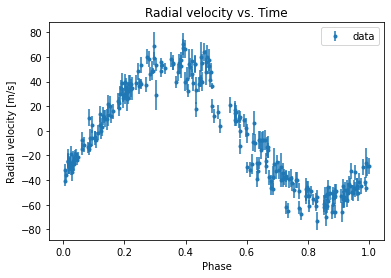

In [9]:
# get the string length and the corresponding phases and velocities for the minimum period
lvalue2, phaseandvel2 = periodogram(minperiod, data)

# plot
plt.errorbar(phaseandvel2[0], phaseandvel2[1], yerr = phaseandvel2[2], fmt = '.', label = 'data') # use errorbar for the plot
plt.title('Radial velocity vs. Time') # plot title
plt.xlabel('Phase') # x-axis title
plt.ylabel('Radial velocity [m/s]')  # y-axis title
plt.legend() # add legend
plt.show() # print the plot

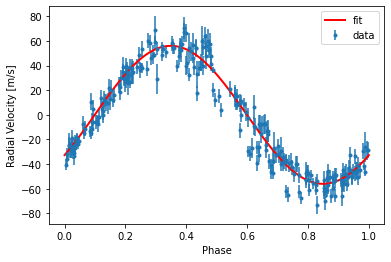

Fit parameter a: 56.0 +- 0.8 m/s
Fit parameter b: 5.66 +- 0.01


In [10]:
# define the function to fit the data
def fitfn(x, a, b):
    return a*np.sin(2*np.pi*x + b)

# create an x-range for the fit curve
# phases lie between 0 and 1 by definition, so we use the below range
xspace = np.linspace(0, 1, 100)
# use curve_fit to calculate the best fit parameters
popt, pcov = curve_fit(fitfn, phaseandvel2[0], phaseandvel2[1], p0 = [60, 3*np.pi/2])
# for the initital conditions we notice that the amplitude is roughly 60 and the zero value is negative and hence we use 3*pi/2
# for a simple function with not many fit parameters like here, we do not need to include initial parameters
# but it is a good habit to add meaningful initial parameters as it ensures faster convergence
# adding meaningful initial parameters becomes a necessity when the fit functions are complicated with lot more parameters

# calculate the error from the covariance matrix
error = np.sqrt(np.diag(pcov))

# plot
plt.errorbar(phaseandvel2[0], phaseandvel2[1], yerr = phaseandvel2[2], fmt = '.', label = 'data') # use errorbar for the data plot 
plt.plot(xspace, fitfn(xspace, popt[0], popt[1]), color = 'r', linewidth = 2.0, label = 'fit') # use plot for the fit function plot
plt.xlabel('Phase') # add x-axis title
plt.ylabel('Radial Velocity [m/s]') # add y-axis title
plt.legend() # add legend
plt.show() # print the plot

# print the fit parameters
# we round the fit parameter a to the first decimal since the data points have only one decimal
print("Fit parameter a:", round(popt[0], 1), "+-", round(error[0], 1), "m/s")
print("Fit parameter b:", round(popt[1], 2), "+-", round(error[1], 2))

**Remarks:**  
Above, we have fit the function given in the problem statement(sinusoidal function), to the radial velocity points plotted against phase. The fit parameter $a$ gives the amplitude and the fit parameter $b$ is not important as it only tells the shift in the curve. The parameter $b$ is also the same up to additions of multiples of $2\pi$, that is $b +  n2\pi$ gives the same fit as $b$, where n is some integer.

In [11]:
# EXTRA
# define a function to calculate the reduced chi-squared value for the fit
def redchi2(f, x, y, y_err, *args):
    """This function takes in the fit function, x data, y data, errors in y data and the fit parameters
    and returns the reduced chi-squared value for the fit"""
    # the erros must be non-zero. rc2 gives inf in case of a measurement with zero error
    sumval = np.sum(np.square((f(x, *args) - y)/y_err)) # calculate the reduce chi-squared value
    dof = len(y) - len(args)
    return sumval/dof

# print the reduced chi-squared value
redchi2fit = redchi2(fitfn, phaseandvel2[0], phaseandvel2[1], phaseandvel2[2], popt[0], popt[1])
print("Reduced chi-squared value for the fit:", round(redchi2fit, 2))

Reduced chi-squared value for the fit: 2.19


**Remarks:**  
We see that reduced chi-squared value for the fit is $2.19$. Values close to $1$ are considered to be good. A reduced chi-squared value greater than 1 implies that the fit has not fully captured the data. This can be seen from the plot where are a good number of points lying far from the fit curve.

In [12]:
# TASK 2

# constants
M0 = 1.989e30
G = 6.6743e-11
mjupiter = 1.898e27

# define a function that returns the gaussian curve
def gauss(x, meanval, sigmaval):
    """This function takes in a range, mean and SD
    and returns the values of the Gaussian function in that range"""
    return (1/(np.sqrt(2*np.pi*sigmaval**2)))*np.exp(-1/2*((x-meanval)/sigmaval)**2)

We start with the following formula derived in the problem statement,
$$q \approx \left( \frac{T}{2\pi GM_*} \right)^{1/3} \frac{K_{obs,star}}{\sin i}.$$
We set $\sin i = 1$ and set $M_*$ as the mass of the sun for our calculation. The error in this quantity is then given by,
$$\Delta q \approx  \left( \frac{T}{2\pi GM_*} \right)^{1/3} a \sqrt{\left(\frac{\Delta T}{3T}\right)^2 + \left(\frac{\Delta a}{a}\right)^2}.$$
$q$ is the ratio of the mass of the object to the mass of the star, the quantity $K_{obs,star}$ is replaced by the fit parameter $a$. The mass of the object (in Jupiter masses) is then,
$$m = q\frac{M_*}{M_{Jupiter}}.$$
The corresponding error in the mass of the object is given by,
$$\Delta m = \Delta q\frac{M_*}{M_{Jupiter}}.$$

In [13]:
# calculate the value of q with sini = 1 and M* = mass of the sun
q = (minperiod*86400/(2*np.pi*G*M0))**(1/3)*popt[0]
# calculate the error in q
deltaq = (1/(2*np.pi*G*M0))**(1/3)*((minperiod*86400)**(1/3)*popt[0])*np.sqrt((deltaminperiod/(3*minperiod))**2 + (error[0]/popt[0])**2)
# calculate the mass of the object in Jupiter masses
m = q*M0/mjupiter
# calulate the error in the mass of the object
deltam = deltaq*M0/mjupiter

# print the values
print("The value of q:", round(q, 6), "+-", round(deltaq, 6))
print("The mass of the object (in Jupiter masses):", round(m, 3), "+-", round(deltam, 3))

The value of q: 0.000425 +- 6e-06
The mass of the object (in Jupiter masses): 0.446 +- 0.007


**Remarks:**  
Setting the viewing angle to $90^{\circ}$ and taking the mass of the star as the mass of the sun, we obtain the above values of $q$ and the mass of the object (in Jupiter masses). This is well below the criterion of mass being lesser than $13$ Jupiter masses for the object to be a planet. As mentioned earlier, the uncertainty is calculated by using the resolution of the period. Although, it should be noted that the main contribution to the uncertainty here comes from the radial velocity measurements (this can be seen by setting `deltaminperiod` to $0$).

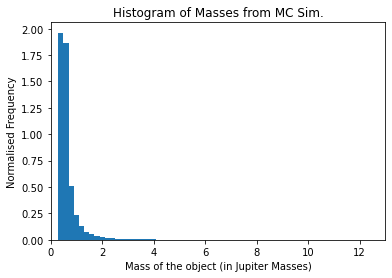

Mass of the object (in Jupiter masses) from MC Sim.: 0.7 +- 0.99
The probability the object is a planet 99.94 %
The point 13 Jupiter masses lies 12.48 standard deviations away from the mean.


In [14]:
# Monte-Carlo sample size
mcsamplesize = int(1e6) # set MC sim. sample size to 1e6

# define the distributions for the MC sim
K = np.random.normal(popt[0], error[0], mcsamplesize) # define K using a normal distribution
M = np.random.uniform(0.6*M0, 1.4*M0, mcsamplesize) # define M using a uniform distribution
cosi = np.random.uniform(0, 1, mcsamplesize) # define cosi using a uniform distribution
sini = np.sqrt(1-cosi**2) # calculate sini values from cosi values

# calculate the distribution of the masses (in Jupiter masses) from the MC distributions
m1 = (minperiod*86400/(2*np.pi*G*M))**(1/3)*(K/sini)*M/mjupiter

# calculations
valuem1 = np.mean(m1) # mean of the masses from MC sim.
deltam1 = np.std(m1) # SD of the masses from MC sim.
probplanet1 = len(np.where(m1<13)[0])/mcsamplesize*100 # probability that the object is a planet
stdcount = (13 - valuem1)/deltam1 # no. of stds the point 13 Jupiter masses lies from the mean

# plot
# normalised histogram of the calculated masses with 0.2 as bin width
plt.hist(m1, density = True, bins = np.arange(min(m1), max(m1) + 0.2, 0.2))
plt.title('Histogram of Masses from MC Sim.') # set title
plt.xlabel('Mass of the object (in Jupiter Masses)') # set x-axis title
plt.ylabel('Normalised Frequency') # set y-axis title
plt.xlim(0, 13) # use x-lim to show the histogram between 0 and 13
plt.show() # print the plot

# results from MC sim.
print("Mass of the object (in Jupiter masses) from MC Sim.:", round(valuem1, 2), "+-", round(deltam1, 2))
print("The probability the object is a planet", round(probplanet1, 2), "%")
print("The point 13 Jupiter masses lies", round(stdcount, 2), "standard deviations away from the mean.")

**Remarks:**  
- We obtain the above results from the MC simulation with the distributions given in the problem statement. We see that the MC simulation gives the mass of the object to be about $0.7$ Jupiter masses and the uncertainty in the mass of the object is roughly about $1$ Jupiter masses. Note that the uncertainty varies quite a lot every time the above cell is executed. This is discussed later. This can be overcome by seeding the random number generator with a fixed seed. But this goes against the point of carrying out a Monte Carlo simulation.
- Using the criterion that the mass of an object must be less than $13$ Jupiter masses for it to be a planet, we obtain a probability of $99.94%$ from the above MC simulation.
- We cannot discuss sigma confidence intervals in this case, since the distribution of the masses clearly does not follow a Gaussian distribution. This is shown in the below plot, where we plot a Gaussian with the same mean and standard deviation on top of the normalised histogram. But we can still talk about how many standard deviations the point $13$ Jupiter masses lies from the mean. However, this is not the sigma confidence interval used in statistics.

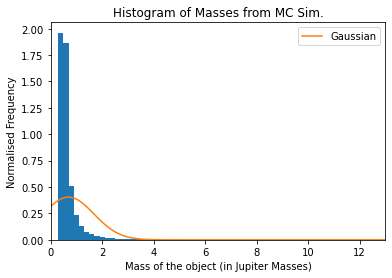

In [15]:
xgauss1 = np.linspace(0, 13, 100) # range for Gaussian curve

# plot
# normalised histogram of the calculated masses with 0.2 as bin width
plt.hist(m1, density = True, bins = np.arange(min(m1), max(m1) + 0.2, 0.2))
plt.plot(xgauss1, gauss(xgauss1, valuem1, deltam1), label = 'Gaussian') # Gaussian curve with the same mean and SD
plt.title('Histogram of Masses from MC Sim.') # set title
plt.xlabel('Mass of the object (in Jupiter Masses)') # set x-axis title
plt.ylabel('Normalised Frequency') # set y-axis title
plt.xlim(0, 13) # use x-lim to show the histogram between 0 and 13
plt.legend() # add legend
plt.show() # print the plot

**Remarks:**  
Based on the above calculations, we can conclude that the object under consideration is a planet with a very high certainty.

#### Digression

In the second task, we relied on Monte Carlo simulations to calculate the uncertainties. However, there's a term `sini` in the denominator of the given formula. Physically, since not all viewing angles are likely, we sample the viewing angles from a uniform distribution of `cosi`. This gives more weight to larger angles (angles closer to $90^{\circ}$; mean of this distribution corresponds to $60^{\circ}$). This makes sense since we expect not to take a lot of observations close to the horizon. But since this term is on the denominator, there are some values of `sini` close to $0$ that blows up the corresponding mass of the object. Even though the number of such values are not significant, they do affect the standard deviation. This can be seen the earlier Monte Carlo simulation, where we obtain different and high values of standard deviation after every run. In our opinion, we can consider a stronger constraint on the viewing angles. We can restrict the viewing angles between $30^{\circ}$ and $90^{\circ}$. This corresponds to sampling `cosi` values from a uniform distribution between $0.5$ and $1$. This condition is not absurd, at least for ground based telescopes for observations in the visible spectrum.

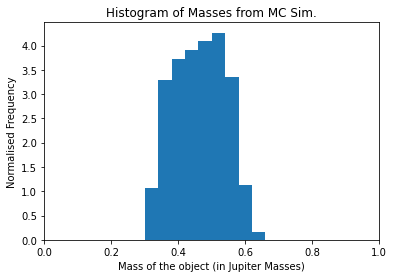

Mass of the object (in Jupiter masses) from MC Sim.: 0.46 +- 0.08
The probability the object is a planet 100.0 %


In [16]:
# EXTRA
cosi2 = np.random.uniform(0, 0.5, mcsamplesize) # restrict the viewing angle to 30 degrees to 90 degrees and define cosi using uniform distribution
sini2 = np.sqrt(1-cosi2**2) # calculate sini values from cosi values

# calculate the distribution of the masses (in Jupiter masses) from the MC distributions
m2 = (minperiod*86400/(2*np.pi*G*M))**(1/3)*(K/sini2)*M/mjupiter

valuem2 = np.mean(m2) # mean of the masses from MC sim.
deltam2 = np.std(m2) # SD of the masses from MC sim.
probplanet2 = len(np.where(m2<13)[0])/mcsamplesize*100 # probability that the object is a planet

# plot
# normalised histogram of the calculated masses with 0.04 as bin width
plt.hist(m2, density = True, bins = np.arange(min(m2), max(m2) + 0.04, 0.04))
plt.title('Histogram of Masses from MC Sim.') # set title
plt.xlabel('Mass of the object (in Jupiter Masses)') # set x-axis title
plt.ylabel('Normalised Frequency') # set y-axis title
plt.xlim(0, 1) # limit to 1 Jupiter masses
plt.show() # print the plot

# results from MC sim.
print("Mass of the object (in Jupiter masses) from MC Sim.:", round(valuem2, 2), "+-", round(deltam2, 2))
print("The probability the object is a planet", round(probplanet2, 2), "%")

**Remarks:**  
We can see that the above Monte Carlo simulation gives a much better result. We should note that the distribution is not normal, which is consistent with the first Monte Carlo simulation. We should also note that the mean angle is no longer $60^{\circ}$, but higher (close to $70^{\circ}$). If we would like to keep the mean angle as $60^{\circ}$, we can sample `cosi` from a uniform distribution between $0.2$ and $0.8$, for example. This misses out angles closer to the zenith but still results in a result with significantly low and consistent standard deviation. 